Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [24]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [25]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df.head()

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0


Cleaning

177.0
['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180']


,throwDirection,whistleThrowTimeGroupInSeconds
2,8.0,20-30
3,3.0,10-20
4,7.0,20-30
5,1.0,20-30
6,3.0,30-40
...,...,...
1014,4.0,20-30
1015,3.0,10-20
1016,3.0,30-40
1017,3.0,10-20


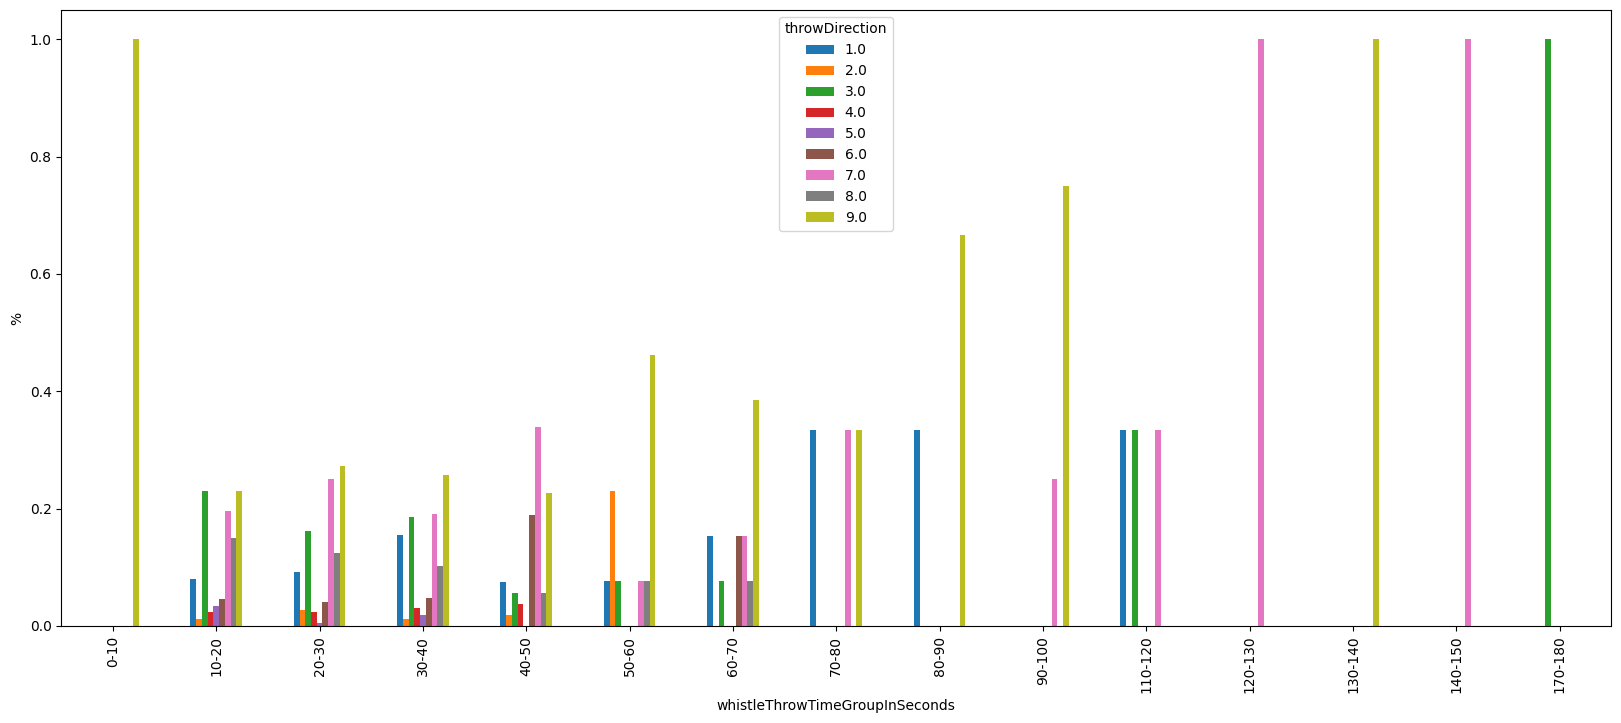

In [26]:
df1 = df.loc[:,('whistleThrowTime','throwDirection')].copy()
df1.dropna(inplace=True)
#Range 1-60
start = 0
print(df1['whistleThrowTime'].max())
stop = 180
step = 10
binLabels = [str(num) + '-' + str(num + step) for num in range(start, stop,step)]
print(binLabels)
df1['whistleThrowTimeGroupInSeconds'] = pd.cut(df1.whistleThrowTime,[num for num in range(start, stop+1,step)], labels=binLabels)
df1.drop(columns=['whistleThrowTime'],inplace=True)
df2 = df1.groupby('whistleThrowTimeGroupInSeconds',observed = True).throwDirection.value_counts(normalize=True)
df2.unstack().plot.bar(ylabel='%',figsize=(20,8))
df2.unstack()
df2.replace(np.nan, 0.0,inplace=True)
df1

In [27]:
ct =pd.crosstab(df1['whistleThrowTimeGroupInSeconds'], df1['throwDirection'], margins=True, margins_name="Total") 
ct

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
whistleThrowTimeGroupInSeconds,,,,,,,,,,
0-10,0,0,0,0,0,0,0,0,1,1
10-20,7,1,20,2,3,4,17,13,20,87
20-30,20,6,35,5,1,9,54,27,59,216
30-40,26,2,31,5,3,8,32,17,43,167
40-50,4,1,3,2,0,10,18,3,12,53
50-60,1,3,1,0,0,0,1,1,6,13
60-70,2,0,1,0,0,2,2,1,5,13
70-80,1,0,0,0,0,0,1,0,1,3
80-90,1,0,0,0,0,0,0,0,2,3


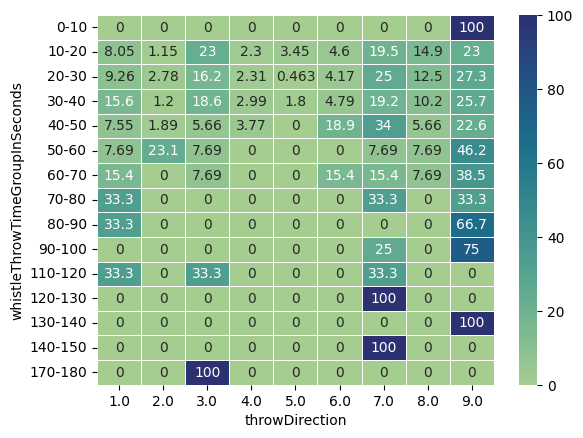

In [28]:
ax = sns.heatmap(pd.crosstab(df1['whistleThrowTimeGroupInSeconds'], df1['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g')
#ax.xaxis.tick_top()
plt.show()